# Making visualizations

# Import libraries, set path and import files

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\valev\Desktop\0325 Instacart Basket Analysis'

In [3]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ord_prods_merge_newvariable_flags.pkl' ))

In [7]:
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl' ))

In [19]:
df_final_active = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_active.pkl' ))

In [4]:
df_ords_prods_merge.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spent',
       'spending_flag', 'median_days_since_orders', 'order_frequency_flag'],
      dtype='object')

In [29]:
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'average_spent', 'spending_flag',
       'median_days_since_orders', 'order_frequency_flag', 'Gender', 'STATE',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

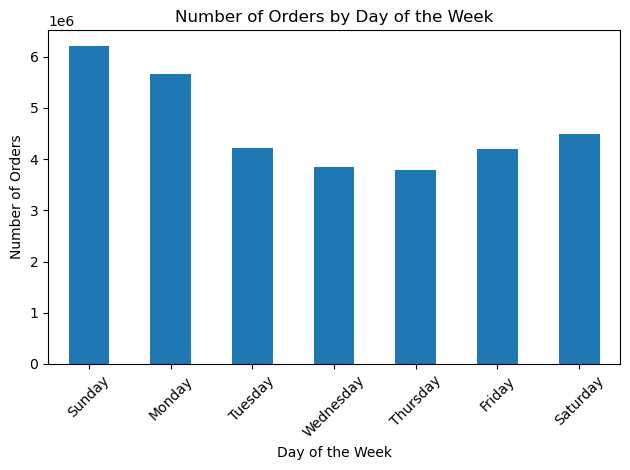

In [6]:
# Create mapping for day numbers to day names
day_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot with customizations
df_ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Add axis labels and title
plt.ylabel('Number of Orders')
plt.xlabel('Day of the Week')
plt.title('Number of Orders by Day of the Week')

# Set x-axis tick labels
plt.xticks(ticks=range(7), labels=day_labels, rotation=45)

plt.tight_layout()
plt.show()

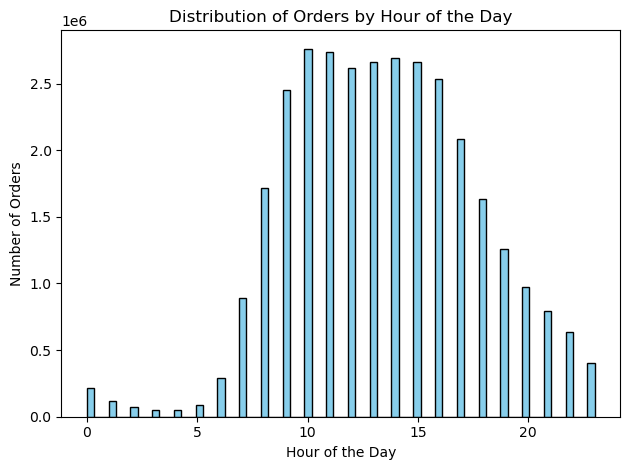

In [10]:
# Create histogram
hist_2 = df_final['order_hour_of_day'].plot.hist(bins=70, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour of the Day')

plt.tight_layout()
plt.show()


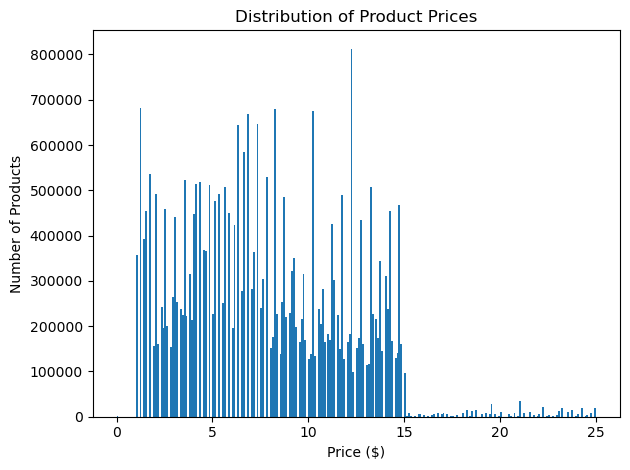

In [17]:
#Create histogram for prices
hist = df_ords_prods_merge['prices'].plot.hist(bins=250)
# Add labels and title
plt.xlabel('Price ($)')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Prices')

plt.tight_layout()
plt.show()

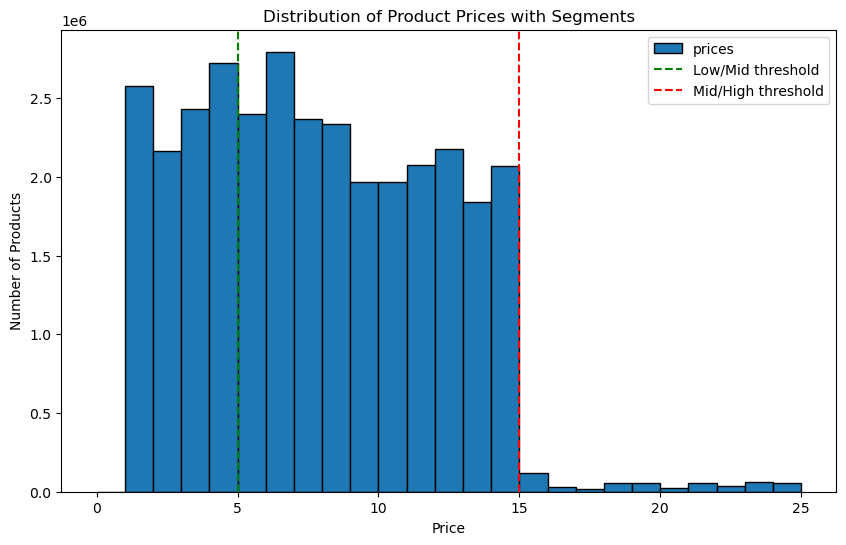

In [18]:
# Plot the histogram
plt.figure(figsize=(10,6))
hist_again = df_ords_prods_merge['prices'].plot.hist(bins=25, edgecolor='black')

# Add vertical lines for segment thresholds
plt.axvline(x=5, color='green', linestyle='--', label='Low/Mid threshold')
plt.axvline(x=15, color='red', linestyle='--', label='Mid/High threshold')

# Labels and title
plt.title('Distribution of Product Prices with Segments')
plt.xlabel('Price')
plt.ylabel('Number of Products')
plt.legend()

# Show the plot
plt.show()

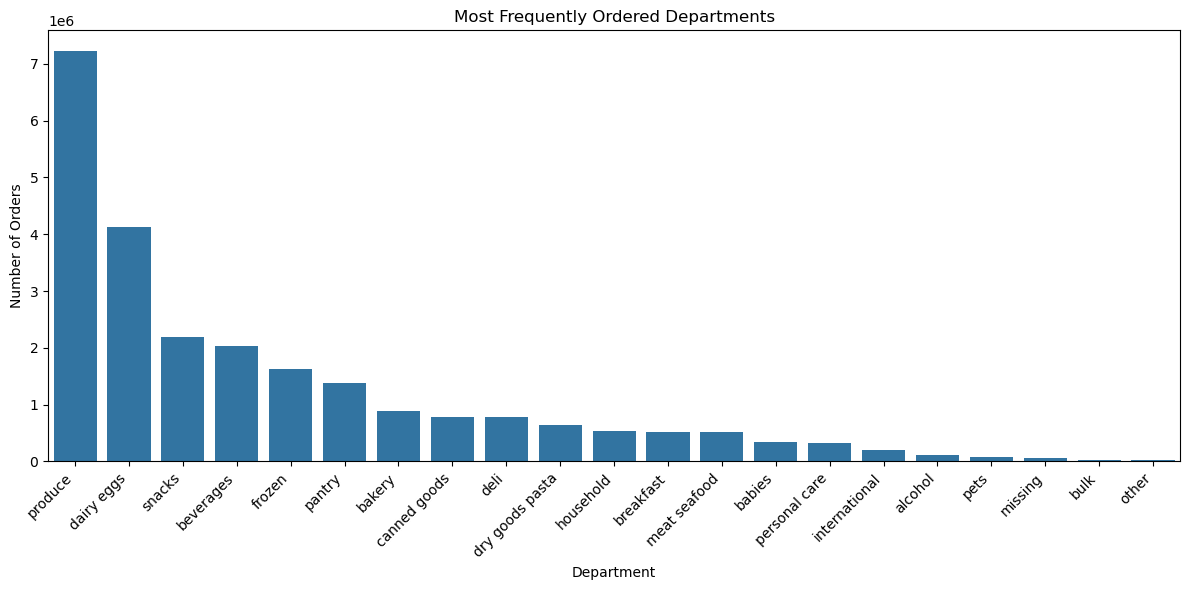

In [21]:
# Group by department and count orders
dept_order_counts = df_final_active['department'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=dept_order_counts.index, y=dept_order_counts.values)

# Add labels and title
plt.title('Most Frequently Ordered Departments')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Brand Loyalty')

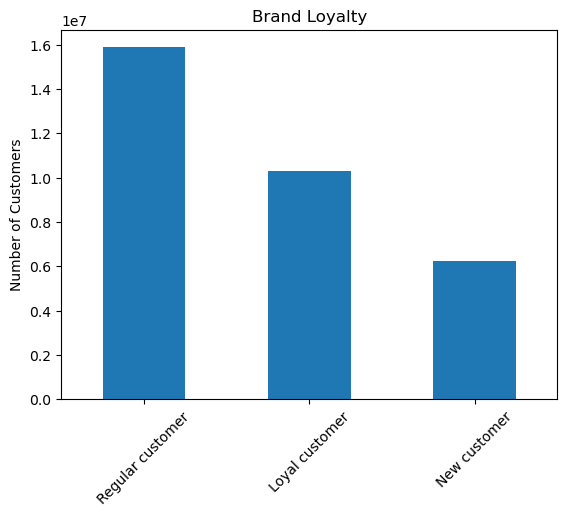

In [23]:
bar_2 = df_final['loyalty_flag'].value_counts().plot.bar()

# Set y-axis label
bar_2.set_ylabel('Number of Customers')

# Remove x-axis label
bar_2.set_xlabel('')

# Rotate x-axis labels
bar_2.set_xticklabels(bar_2.get_xticklabels(), rotation=45)

# Set chart title
bar_2.set_title('Brand Loyalty')

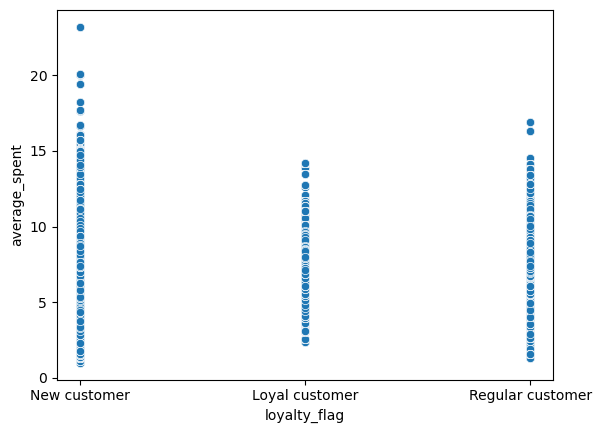

In [24]:
scatter_1 = sns.scatterplot(x = 'loyalty_flag', y = 'average_spent',data = df_final)

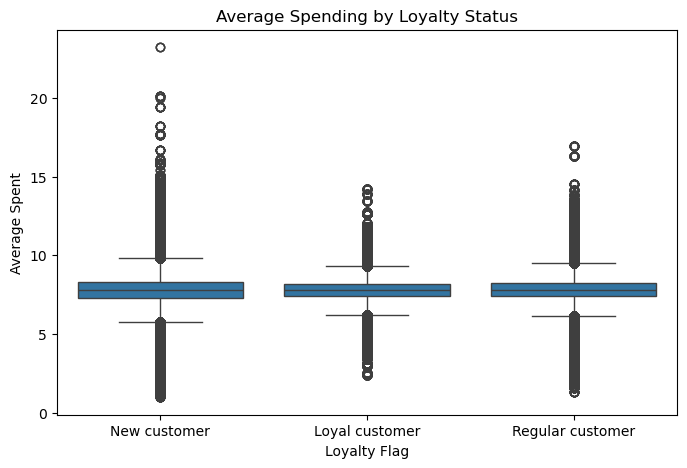

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_final, x='loyalty_flag', y='average_spent')
plt.title('Average Spending by Loyalty Status')
plt.xlabel('Loyalty Flag')
plt.ylabel('Average Spent')
plt.show()

C:\Users\valev\AppData\Local\Temp\ipykernel_10592\3608112954.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_final_active, x='Region', y='average_spent', estimator='mean', ci=None, palette='Set2')
C:\Users\valev\AppData\Local\Temp\ipykernel_10592\3608112954.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final_active, x='Region', y='average_spent', estimator='mean', ci=None, palette='Set2')


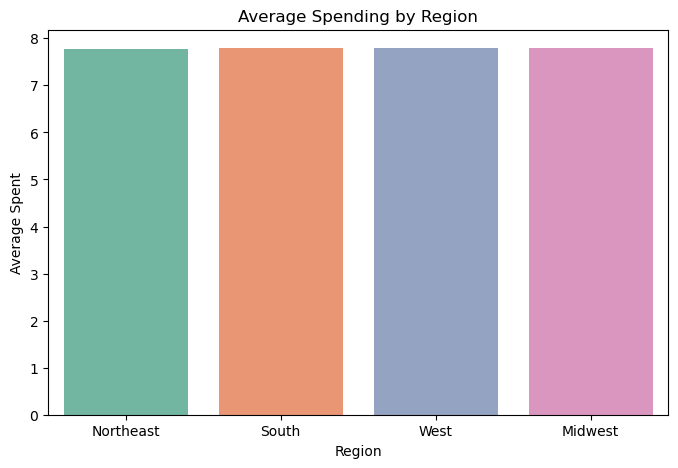

In [30]:
regionplot = plt.figure(figsize=(8,5))
sns.barplot(data=df_final_active, x='Region', y='average_spent', estimator='mean', ci=None, palette='Set2')
plt.title('Average Spending by Region')
plt.ylabel('Average Spent')
plt.xlabel('Region')
plt.show()

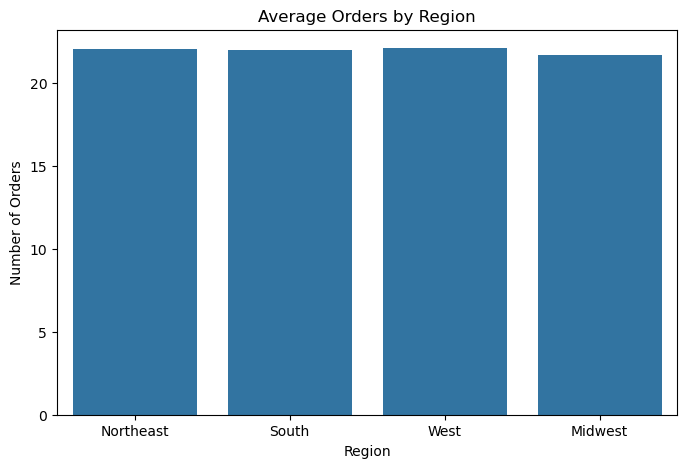

In [31]:
regionplot_1 = plt.figure(figsize=(8,5))
sns.barplot(data=df_final_active, x='Region', y='order_number', estimator='mean', errorbar=None)
plt.title('Average Orders by Region')
plt.ylabel('Number of Orders')
plt.xlabel('Region')
plt.show()

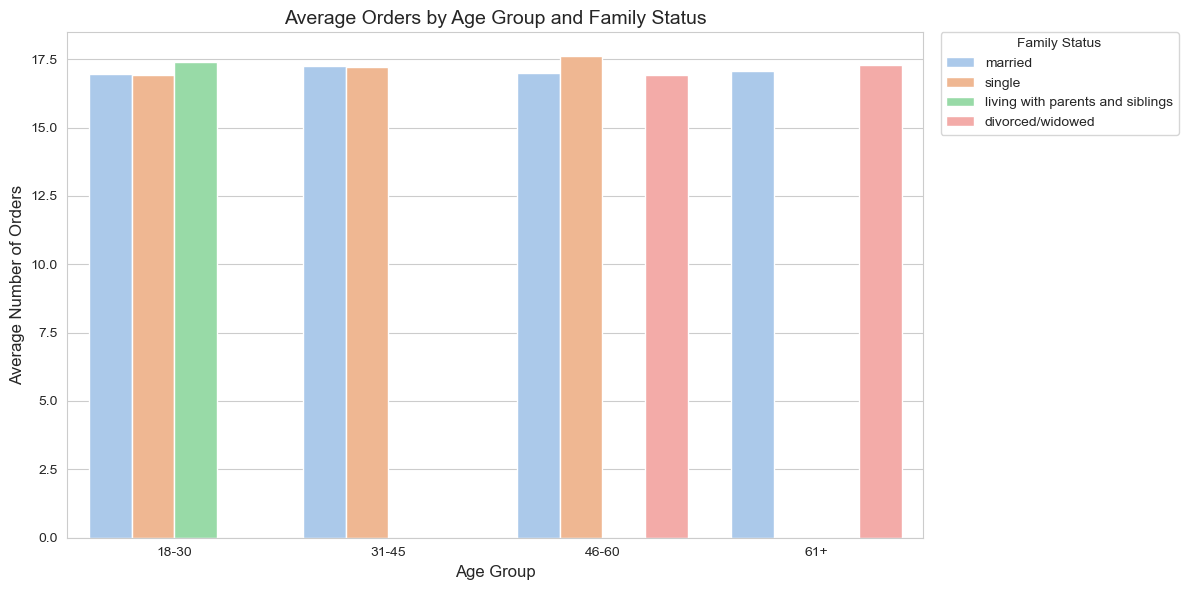

In [37]:
habits = plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Optional: bin ages into groups (makes chart easier to interpret)
df_final['age_group'] = pd.cut(df_final['Age'], 
                               bins=[18, 30, 45, 60, 81], 
                               labels=['18-30', '31-45', '46-60', '61+'])

# Grouped plot
sns.barplot(data=df_final, 
            x='age_group', 
            y='order_number', 
            hue='fam_status', 
            palette='pastel',
            errorbar=None)

plt.title('Average Orders by Age Group and Family Status', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Number of Orders', fontsize=12)
# Move legend outside
plt.legend(
    title='Family Status',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

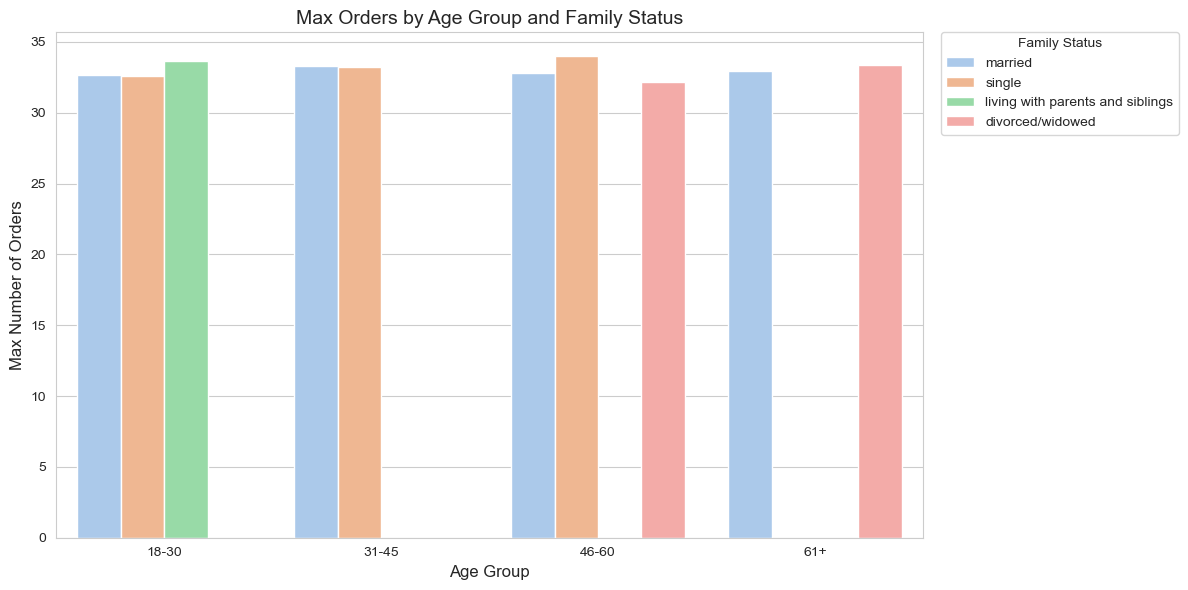

In [38]:
habits = plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Optional: bin ages into groups (makes chart easier to interpret)
df_final['age_group'] = pd.cut(df_final['Age'], 
                               bins=[18, 30, 45, 60, 81], 
                               labels=['18-30', '31-45', '46-60', '61+'])

# Grouped plot
sns.barplot(data=df_final, 
            x='age_group', 
            y='max_order', 
            hue='fam_status', 
            palette='pastel',
            errorbar=None)

plt.title('Max Orders by Age Group and Family Status', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Max Number of Orders', fontsize=12)
# Move legend outside
plt.legend(
    title='Family Status',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    borderaxespad=0
)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

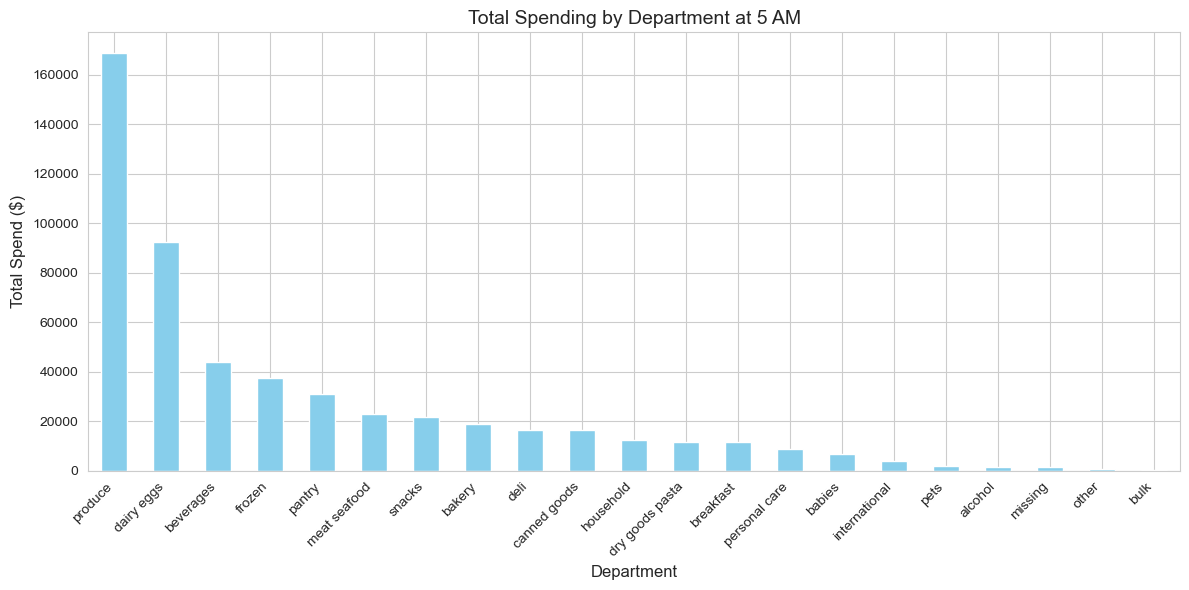

In [41]:
# Filter orders placed at 5 AM
df_5am = df_final_active[df_final_active['order_hour_of_day'] == 5]

# Group by department and calculate total spending
dept_spending_5am = df_5am.groupby('department')['prices'].sum().sort_values(ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
dept_spending_5am.plot(kind='bar', color='skyblue')

plt.title('Total Spending by Department at 5 AM', fontsize=14)
plt.ylabel('Total Spend ($)', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()